#### **File : Menghitung Deteksi Dengan Template Matching.ipynb**

#### **Authors : Syahrul Fikri**

#### **NIM : 1207070121**

#### **Pengolahan Citra Digital - TKK**

#### **Teknik Elektro Fakultas Sains dan Teknologi Universitas Islam Negeri Sunan Gunung Djati Bandung**

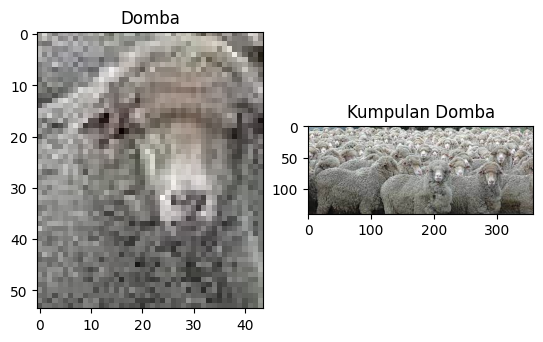

In [4]:
# tampilkan kedua gambar 
import cv2
from matplotlib import pyplot as plt 

# panggil dan konversi warna agar sesuai dengan Matplotlib 
domba = cv2.imread('Domba.jpg') 
domba = cv2.cvtColor(domba, cv2.COLOR_BGR2RGB) 

# panggil dan konversi warna agar sesuai dengan Matplotlib 
Domba_swarm = cv2.imread('Gerombolan Domba.jpg') 
Domba_swarm = cv2.cvtColor(Domba_swarm, cv2.COLOR_BGR2RGB) 

plt.subplot(121),plt.imshow(domba), plt.title('Domba') 
plt.subplot(122),plt.imshow(Domba_swarm), plt.title('Kumpulan Domba') 
plt.show()

In [5]:
import cv2 
import numpy as np 
#from google.colab.patches import cv2_imshow 

## membaca gambar utuh untuk dicari 
img_rgb = cv2.imread('Gerombolan Domba.jpg') 
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY) 

## membaca template 
template = cv2.imread('Domba.jpg',0) 

## ukuran template. ukuran ini akan digunakan untuk menggambar kotak 
w, h = template.shape[::-1] 

# menggunakan metode COEFF-NORMALIZED 
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED) 

# Nilai threshold atau ambang batas deteksi kemiripan titik. 
# Lakukan eksperimen dengan merubah nilai ini 
threshold = 0.15 
loc = np.where(res >= threshold) 

## membuat array kosong untuk menyimpan lokasi-lokasi dari hasil deteksi 
lspoint=[] 
lspoint2=[]
count = 0 # untuk menyimpan jumlah matching yang ditemukan 
for pt in zip(*loc[::-1]): 
    ## jika sudah ada, skip lokasi tersebut 
    if pt[0] not in lspoint and pt[1] not in lspoint2: 
        ## gambar persegi warna kuning dengan ketebalan dua poin 
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2) 
        for i in range(((pt[0])-9), ((pt[0])+9),1): 
            ## tambahkan koordinat x ke list 
            lspoint.append(i) 
        for k in range(((pt[1])-9), ((pt[1])+9),1): 
            ## tambahkan koordinat y ke list 
            lspoint2.append(k) 
        count+=1 ### berapa jumlah matching yang ditemukan? 
    else: 
        continue 
print ("Jumlah objek ditemukan ", count)

## tampilkan dengan imshow 
cv2.imshow("Detected Objects", img_rgb)
cv2.waitKey(0)

Jumlah objek ditemukan  10


-1